<a href="https://colab.research.google.com/github/DenizFeital/Modulo5-Entregavel1/blob/main/metaentrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

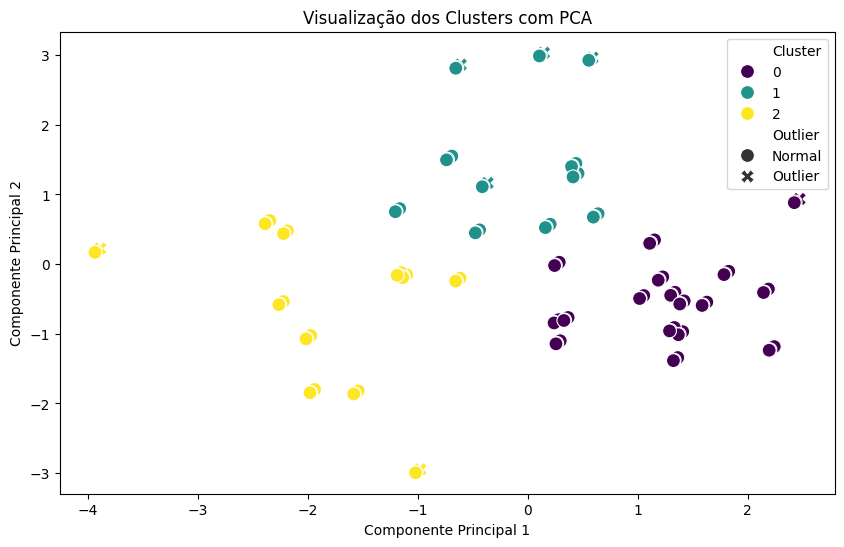

Outliers identificados:
              Crop   Yield  Temperature at 2 Meters (C)      PCA1      PCA2
40  Oil palm fruit  201436                        26.11 -3.884556  0.222690
42  Oil palm fruit  181826                        25.56 -0.976338 -2.947008
56  Oil palm fruit  142425                        26.79  0.588488  2.964457
72  Oil palm fruit  203399                        26.43 -0.364366  1.165430
74  Oil palm fruit  172601                        26.81  0.147191  3.034655
75  Oil palm fruit  199074                        26.46  2.469653  0.935648
77  Oil palm fruit  189896                        26.72 -0.608334  2.863481
79     Rice, paddy   27619                        26.11 -3.927721  0.174147


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# Função para limpar a tela
def limpar_tela():
    os.system('cls' if os.name == 'nt' else 'clear')

limpar_tela()

# Carregar os dados
df = pd.read_csv('crop_yield.csv')

# Selecionar as colunas numéricas relevantes para a clusterização
colunas = [
    'Precipitation (mm day-1)',
    'Specific Humidity at 2 Meters (g/kg)',
    'Relative Humidity at 2 Meters (%)',
    'Temperature at 2 Meters (C)',
    'Yield'
]
df_selected = df[colunas].dropna()

# Normalizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Aplicar K-Means para clusterização (definindo 3 clusters, por exemplo)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_selected['Cluster'] = kmeans.fit_predict(df_scaled)

# Identificar outliers com Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_selected['Outlier'] = iso_forest.fit_predict(df_scaled)
df_selected['Outlier'] = df_selected['Outlier'].apply(lambda x: 'Outlier' if x == -1 else 'Normal')

# Adicionar a coluna Crop para referência
df_selected['Crop'] = df['Crop']

# Aplicar PCA para reduzir a dimensionalidade para 2 componentes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_selected['PCA1'] = principal_components[:, 0]
df_selected['PCA2'] = principal_components[:, 1]

# Visualizar os clusters e outliers com os componentes do PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_selected,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    style='Outlier',
    palette='viridis',
    s=100
)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Exibir os outliers identificados (alguns exemplos)
outliers = df_selected[df_selected['Outlier'] == 'Outlier']
print("Outliers identificados:")
print(outliers[['Crop', 'Yield', 'Temperature at 2 Meters (C)', 'PCA1', 'PCA2']].head(10))
